In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/kashyap/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]

True

In [2]:
!git init

Reinitialized existing Git repository in /home/kashyap/AML Assignments/AML_Assignment2/.git/


In [3]:
!dvc init -f

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [4]:
!dvc config core.autostage true

In [5]:
!git status

HEAD detached from 9d1af8e
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   .dvc/config

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config
	modified:   mlruns/0/39985132ee4c466a9fe662e4d9542061/meta.yaml
	modified:   mlruns/0/5f35307d7c11440e836ff9ad10e31fb2/meta.yaml
	modified:   mlruns/0/7ed85283f3434f6eba5e07df617ac009/meta.yaml
	modified:   mlruns/0/a096e670090a45ffa77454797152a2ce/meta.yaml
	modified:   train.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mlartifacts/0/55989f4087ae4608ab0cc5ea59b62245/
	mlartifacts/0/c14f9126ff434e67a4c6ff6860492ee4/
	mlartifacts/0/fdd51957b87d49b184389d220a25154a/
	mlruns/0/147dc1a1c484471b817742cd22e461f7/
	mlruns/0/14e3d48fe4b641fb928978d33958588d/
	mlruns/0/38e79da640914ae4b7af9b1bd10b2e1f/
	mlruns/0/3d27e9bf570647e0ae24dd3f

In [6]:
data = pd.read_csv("emails.csv")

In [7]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [10]:
data.groupby("spam").count()

,text
spam,
0,4360
1,1368


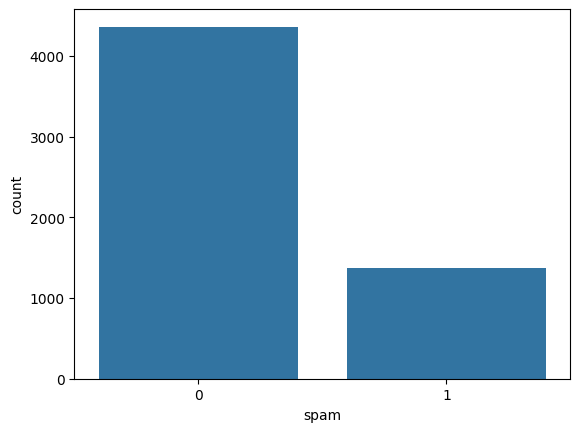

In [11]:
sns.countplot(x='spam',data=data)
plt.show()

In [12]:
def text_processing(text):
    # Convert text to lowercase
    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    text = nltk.word_tokenize(text)

    y = []
    for token in text:
        if token not in nltk.corpus.stopwords.words('english'):
            y.append(token)
    
    return " ".join(y[1:])


In [13]:
data["after_token"] = data.apply(lambda row: text_processing(row['text']), axis = 1) 

In [14]:
data

,text,spam,after_token
0,Subject: naturally irresistible your corporate...,1,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting sh...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional in...
4,"Subject: do not have money , get software cds ...",1,money get software cds software compatibility ...
...,...,...,...
5723,Subject: re : research and development charges...,0,research development charges gpg forwarded shi...
5724,"Subject: re : receipts from visit jim , than...",0,receipts visit jim thanks invitation visit lsu...
5725,Subject: re : enron case study update wow ! a...,0,enron case study update wow day super thank mu...
5726,"Subject: re : interest david , please , call...",0,interest david please call shirley crenshaw as...


In [15]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')


In [16]:
data[data['spam'] == 1]['after_token']

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new homes made easy im wanting sh...
3       4 color printing special request additional in...
4       money get software cds software compatibility ...
                              ...                        
1363    ready get hello viagra 1 med struggle mens ere...
1364    would like 250 gas card let current high price...
1365    immediate reply needed dear sir dr james alabi...
1366    wan na see get fisted fist bang show everythin...
1367    hot stock info drgv announces another press re...
Name: after_token, Length: 1368, dtype: object

Text(0.5, 1.0, 'Spam email Word cloud')

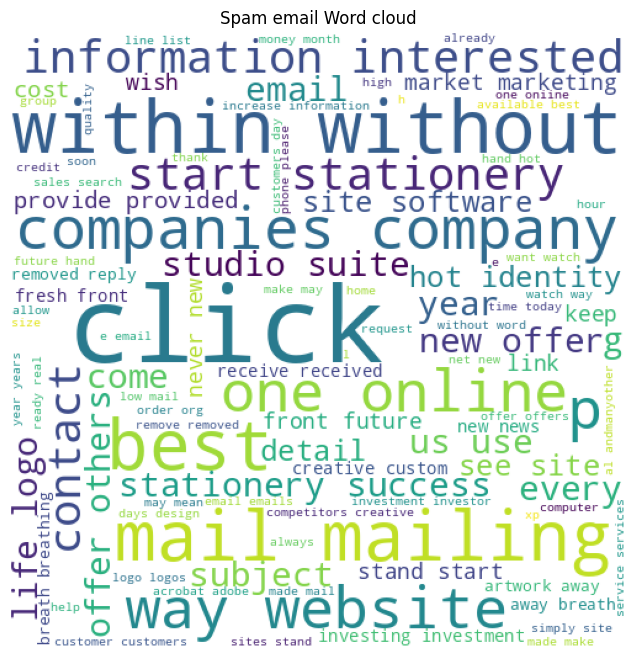

In [17]:
l = ''
for i in data[data["spam"] == 1]["after_token"]:
    u = np.unique(np.array(i.split()))
    for j in u:
        l = l + j + " "

spam_wc = wc.generate(l)

plt.figure(figsize = (15,8))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam email Word cloud")


Text(0.5, 1.0, 'ham email Word cloud')

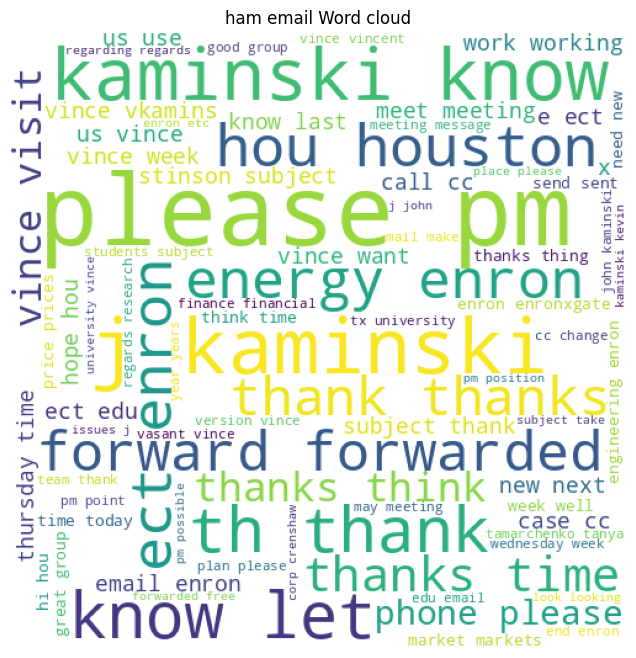

In [18]:
l = ''
for i in data[data["spam"] == 0]["after_token"]:
    u = np.unique(np.array(i.split()))
    for j in u:
        l = l + j + " "

ham_wc = wc.generate(l)

plt.figure(figsize = (15,8))
plt.imshow(ham_wc)
plt.axis("off")
plt.title("ham email Word cloud")


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test_valid, y_train, y_test_valid = train_test_split(data['after_token'], data['spam'], train_size = 0.7, random_state = 230)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, train_size = 0.5, random_state = 201)



In [20]:
X_train = X_train.reset_index(drop = True)
X_valid = X_valid.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_valid = y_valid.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [21]:
train_dataset = pd.DataFrame()
train_dataset['Preprocessed_text'] = X_train
train_dataset['Spam'] = y_train

test_dataset = pd.DataFrame()
test_dataset['Preprocessed_text'] = X_test
test_dataset['Spam'] = y_test

valid_dataset = pd.DataFrame()
valid_dataset['Preprocessed_text'] = X_valid
valid_dataset['Spam'] = y_valid

In [22]:
train_dataset.to_csv('train.csv', index = False)
test_dataset.to_csv('test.csv', index = False)
valid_dataset.to_csv('validation.csv', index = False)


In [23]:
!dvc add train.csv validation.csv test.csv

⠋ Checking graph                                       core>
  0% Adding...|                          | train.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Adding train.csv to cache             0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /home/kashyap/AML Assignm0/1 [00:00<?,    ?files/s]
  0% Adding...|                     | validation.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Adding validation.

In [24]:
!git add train.csv.dvc validation.csv.dvc test.csv.dvc

In [25]:
!git commit -m 'Before seed changed'

[detached HEAD 4855832] Before seed changed
 4 files changed, 6 insertions(+), 8 deletions(-)


In [26]:
pd.read_csv('train.csv')

,Preprocessed_text,Spam
0,interview enron research group hello mr kudin ...,0
1,conference room kevin yes good idea vince kevi...,0
2,update account information dear client lasalle...,1
3,christian health plan offer vision dental medi...,1
4,inn penn danielle fyi information regarding be...,0
...,...,...
4004,contacts uh econo physics vince contacts uh wo...,0
4005,ben zhang timeframe hi organize tag team baby ...,0
4006,message anjam ahmad dear 25 th october announc...,0
4007,visiting enron giuseppe thanks lot would appre...,0


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test_valid, y_train, y_test_valid = train_test_split(data['after_token'], data['spam'], train_size = 0.7, random_state = 752)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, train_size = 0.5, random_state = 456)



In [28]:
X_train = X_train.reset_index(drop = True)
X_valid = X_valid.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_valid = y_valid.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [29]:
train_dataset = pd.DataFrame()
train_dataset['Preprocessed_text'] = X_train
train_dataset['Spam'] = y_train

test_dataset = pd.DataFrame()
test_dataset['Preprocessed_text'] = X_test
test_dataset['Spam'] = y_test

valid_dataset = pd.DataFrame()
valid_dataset['Preprocessed_text'] = X_valid
valid_dataset['Spam'] = y_valid

In [30]:
train_dataset.to_csv('train.csv', index = False)
test_dataset.to_csv('test.csv', index = False)
valid_dataset.to_csv('validation.csv', index = False)


In [31]:
!dvc add train.csv validation.csv test.csv

⠋ Checking graph                                       core>
  0% Adding...|                          | train.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Adding train.csv to cache             0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /home/kashyap/AML Assignm0/1 [00:00<?,    ?files/s]
  0% Adding...|                     | validation.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Adding validation.

In [32]:
!git add train.csv.dvc validation.csv.dvc test.csv.dvc

In [33]:
!git commit -m 'After seed changed'

[detached HEAD ce055cb] After seed changed
 3 files changed, 6 insertions(+), 6 deletions(-)


In [34]:
pd.read_csv('train.csv')

,Preprocessed_text,Spam
0,information shalesh please look give informati...,0
1,cinergy monthly prices 1998 date margaret plea...,0
2,trial weathereffects web site mike following p...,0
3,picks analyst high level precision small cap s...,1
4,credit exposure model alex set meeting bill br...,0
...,...,...
4004,eol stuff vince spoke tom completely agree wou...,0
4005,interview schedule shen charles yingquan pleas...,0
4006,var metals preference aggregated var methodolo...,0
4007,calling small stock players ames fascism conra...,1


In [35]:
!git log

commit ce055cb897ddd7d2c48bb781c45b068bc4ca5b68 (HEAD, origin/HEAD, main)
Author: anurajkashyap <anurajkashyap1234@gmail.com>
Date:   Tue Feb 20 21:17:55 2024 +0530

    After seed changed

commit 48558323e35c701c0203ed3630edeec9c6af6ff9
Author: anurajkashyap <anurajkashyap1234@gmail.com>
Date:   Tue Feb 20 21:17:01 2024 +0530

    Before seed changed

commit f3aa097a2ad9fe457bcbc62572473a804b77f6a9 (origin/main)
Author: anurajkashyap <anurajkashyap1234@gmail.com>
Date:   Sun Feb 18 13:42:37 2024 +0530

    Prepared train.ipynb and tried mlflow

commit c055377d9b4d8e625a1ac663c5f6f15b77a95861
Author: anurajkashyap <anurajkashyap1234@gmail.com>
Date:   Sun Feb 18 00:35:09 2024 +0530

    updated prepare.ipynb and done dvc to store 2 versions of splitted data

commit 9d1af8eb27cfbfa01769587b63ac35a4cde7a7e2
Author: anurajkashyap <anurajkashyap1234@gmail.com>
Date:   Sun Feb 18 00:13:21 2024 +0530

    Updated version of data created

commit 3371fa0f5e75fc52b0a367f086acf8167fec148c
Author

In [36]:
!git checkout 48558323e35c701c0203ed3630edeec9c6af6ff9

M	.dvc/config
M	mlruns/0/39985132ee4c466a9fe662e4d9542061/meta.yaml
M	mlruns/0/5f35307d7c11440e836ff9ad10e31fb2/meta.yaml
M	mlruns/0/7ed85283f3434f6eba5e07df617ac009/meta.yaml
M	mlruns/0/a096e670090a45ffa77454797152a2ce/meta.yaml
M	prepare.ipynb
M	train.ipynb
Previous HEAD position was ce055cb After seed changed
HEAD is now at 4855832 Before seed changed


In [37]:
!dvc checkout

Building workspace index                              |3.00 [00:00, 78.9entry/s]
Comparing indexes                                    |4.00 [00:00, 3.51kentry/s]
Applying changes                                      |3.00 [00:00,   169file/s]
M       train.csv
M       validation.csv
M       test.csv


In [38]:
print("Distribution of target variable in train.csv (before update):")
train_data = pd.read_csv('train.csv')
print(train_data['Spam'].value_counts())
print("Distribution of target variable in validation.csv (before update):")
validation_data = pd.read_csv('validation.csv')
print(validation_data['Spam'].value_counts())
print("Distribution of target variable in test.csv (before update):")
test_data = pd.read_csv('test.csv')
print(test_data['Spam'].value_counts())

Distribution of target variable in train.csv (before update):
Spam
0    3026
1     983
Name: count, dtype: int64
Distribution of target variable in validation.csv (before update):
Spam
0    663
1    197
Name: count, dtype: int64
Distribution of target variable in test.csv (before update):
Spam
0    671
1    188
Name: count, dtype: int64


In [39]:
!git checkout ce055cb897ddd7d2c48bb781c45b068bc4ca5b68

M	.dvc/config
M	mlruns/0/39985132ee4c466a9fe662e4d9542061/meta.yaml
M	mlruns/0/5f35307d7c11440e836ff9ad10e31fb2/meta.yaml
M	mlruns/0/7ed85283f3434f6eba5e07df617ac009/meta.yaml
M	mlruns/0/a096e670090a45ffa77454797152a2ce/meta.yaml
M	prepare.ipynb
M	train.ipynb
Previous HEAD position was 4855832 Before seed changed
HEAD is now at ce055cb After seed changed


In [40]:
!dvc checkout

Building workspace index                              |3.00 [00:00,  151entry/s]
Comparing indexes                                    |4.00 [00:00, 3.44kentry/s]
Applying changes                                      |3.00 [00:00,   200file/s]
M       test.csv
M       validation.csv
M       train.csv


In [41]:
print("Distribution of target variable in train.csv (after update):")
train_data = pd.read_csv('train.csv')
print(train_data['Spam'].value_counts())
print("Distribution of target variable in validation.csv (after update):")
validation_data = pd.read_csv('validation.csv')
print(validation_data['Spam'].value_counts())
print("Distribution of target variable in test.csv (after update):")
test_data = pd.read_csv('test.csv')
print(test_data['Spam'].value_counts())

Distribution of target variable in train.csv (after update):
Spam
0    3042
1     967
Name: count, dtype: int64
Distribution of target variable in validation.csv (after update):
Spam
0    665
1    195
Name: count, dtype: int64
Distribution of target variable in test.csv (after update):
Spam
0    653
1    206
Name: count, dtype: int64
